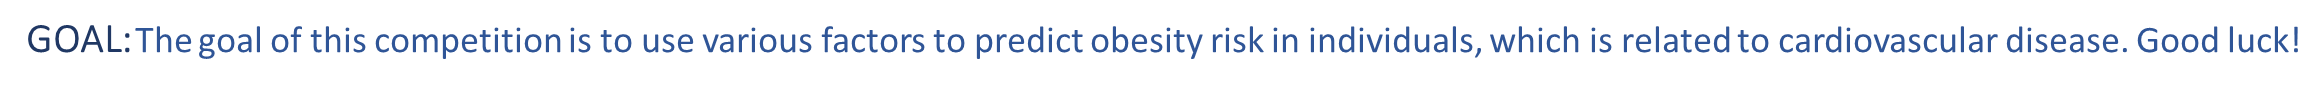

**Introduction:**

Hello everyone, today I am creating this amazing notebook that will be helpful for you to understand the complex data related to obesity risk. I will do my best to make this notebook simple and informative so that even beginners can comprehend the code and the data. Please take a look at the entire notebook and give it an upvote.


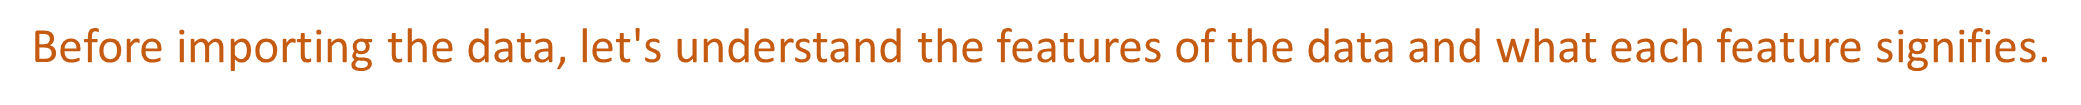

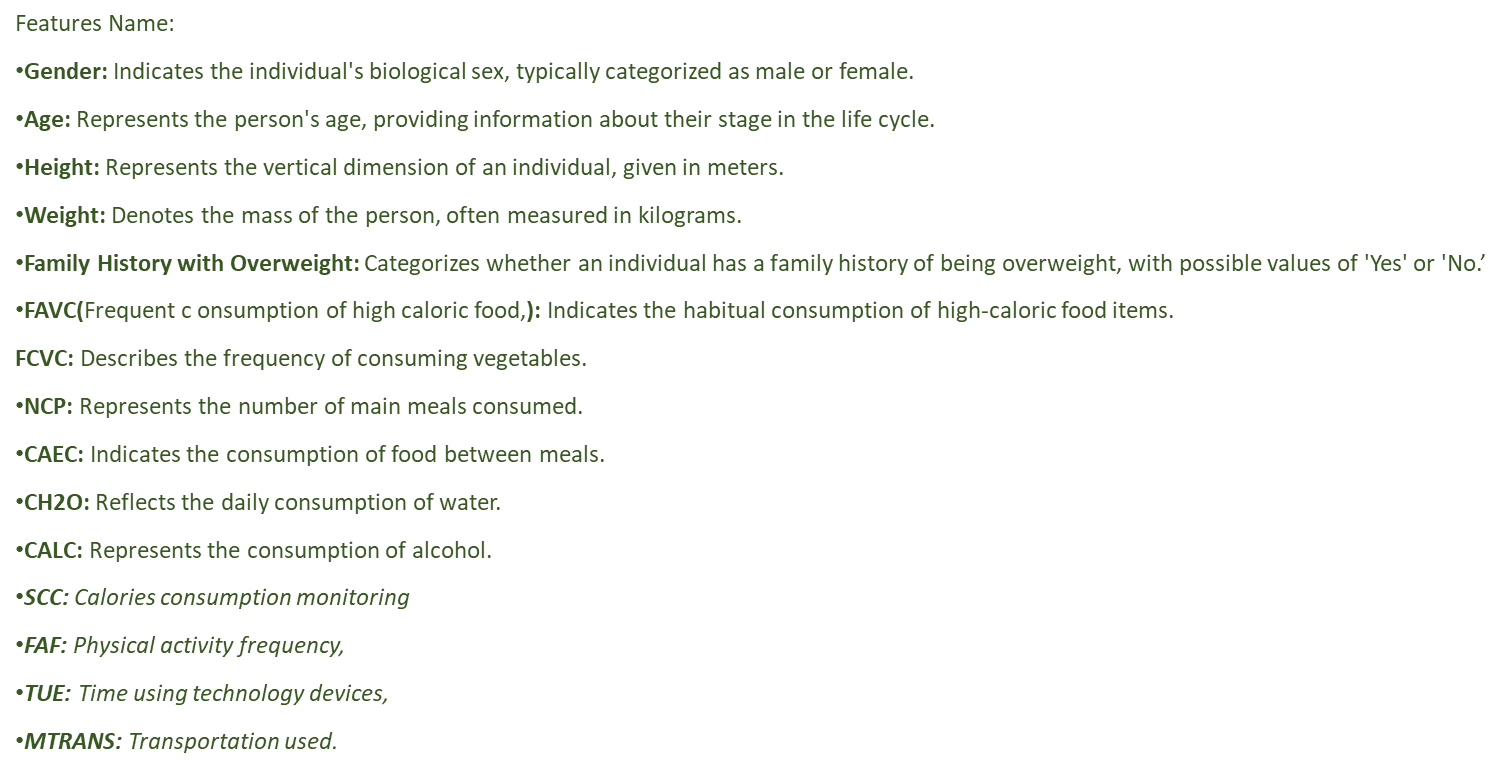

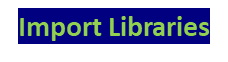

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import boxcox
import optuna
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv
/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


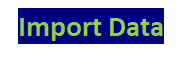

In [3]:
data = pd.read_csv('train.csv').drop('id',axis=1)
data_test = pd.read_csv('test.csv').drop('id',axis=1)
orignal = pd.read_csv('ObesityDataSet.csv')

# DROP ID 
# The reason for dropping the 'id' column is that its values are similar to an index.

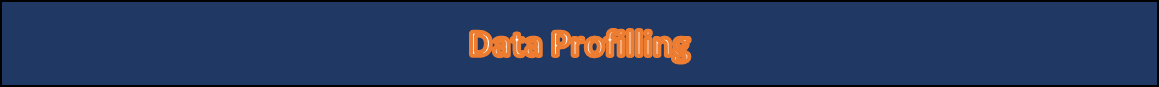

In [4]:
# Combind Orignal and train data
data = pd.concat([data,orignal],ignore_index=True)

In [5]:
# Show randon 5 rows and their values
data.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
11857,Male,23.000000,1.930000,121.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Obesity_Type_II
3054,Female,22.000000,1.700000,50.000000,no,yes,3.000000,4.000000,Frequently,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
443,Male,31.965402,1.899588,88.431954,yes,yes,2.766612,2.374791,Sometimes,no,1.960131,no,0.454944,0.000000,Sometimes,Automobile,Overweight_Level_II
12856,Female,25.498965,1.668931,104.945820,yes,yes,3.000000,3.000000,Sometimes,no,1.527036,no,0.259427,0.384662,Sometimes,Public_Transportation,Obesity_Type_III
1703,Male,19.816228,1.814182,58.195150,yes,yes,3.000000,3.000000,Sometimes,no,2.406541,no,2.000000,0.560887,Sometimes,Automobile,Insufficient_Weight


In [6]:
# Check Column Shape 

print("train data shape ",data.shape)
print("test data shape", data_test.shape)

train data shape  (22869, 17)
test data shape (13840, 16)


In [7]:
# Check Column Names
print("Column Names of train data",data.columns)
print('--' * 50)
print("Column Names of test data",data_test.columns)

Column Names of train data Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Column Names of test data Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')


In [8]:
# Checking for the presence of missing values in the dataset.
data.isnull().sum()
print('--' * 50)
data_test.isnull().sum()


# There is no missing value in any column.

----------------------------------------------------------------------------------------------------


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [9]:
# Information of all Columns Dtype 
data.info()
print('--'*50)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22869 entries, 0 to 22868
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  object 
 12  FAF                             

In [10]:
# Checking if there are duplicate values or not
data[data.duplicated()]


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20856,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
20864,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
20932,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
20937,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
20942,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
20967,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
21067,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
21218,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
21225,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
21254,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [11]:
# drop duplicated values
data.drop_duplicates(inplace=True)

In [12]:
data.describe()
# This table is providing us with a summary of numerical columns in the data."

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000
mean,23.888513,1.700467,87.793761,2.443675,2.755837,2.027165,0.984585,0.620984
std,5.755338,0.087865,26.363367,0.533392,0.711185,0.608479,0.839728,0.602802
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.755907,0.015860,0.000000
50%,22.815416,1.700000,84.000000,2.393837,3.000000,2.000000,1.000000,0.582840
75%,26.000000,1.763029,111.531208,3.000000,3.000000,2.531984,1.600431,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [13]:
data_test.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


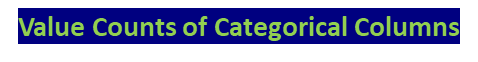

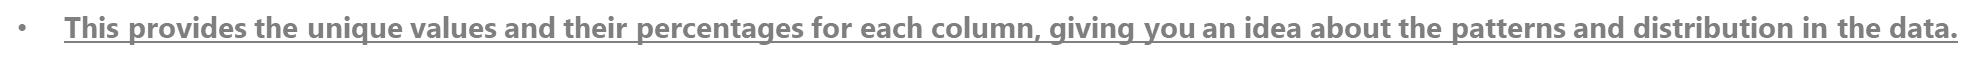

In [14]:
columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']
for i in columns:
    print('--' * 50)
    print(f"Unique values and their counts for column {i}:")
    print(round(data[i].value_counts(normalize=True)*100))

----------------------------------------------------------------------------------------------------
Unique values and their counts for column Gender:
Gender
Female    50.0
Male      50.0
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
Unique values and their counts for column family_history_with_overweight:
family_history_with_overweight
yes    82.0
no     18.0
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
Unique values and their counts for column FAVC:
FAVC
yes    91.0
no      9.0
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
Unique values and their counts for column CAEC:
CAEC
Sometimes     84.0
Frequently    12.0
Always         2.0
no             1.0
Name: proportion, dtype: float64
------------------------------------------

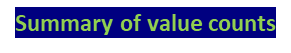

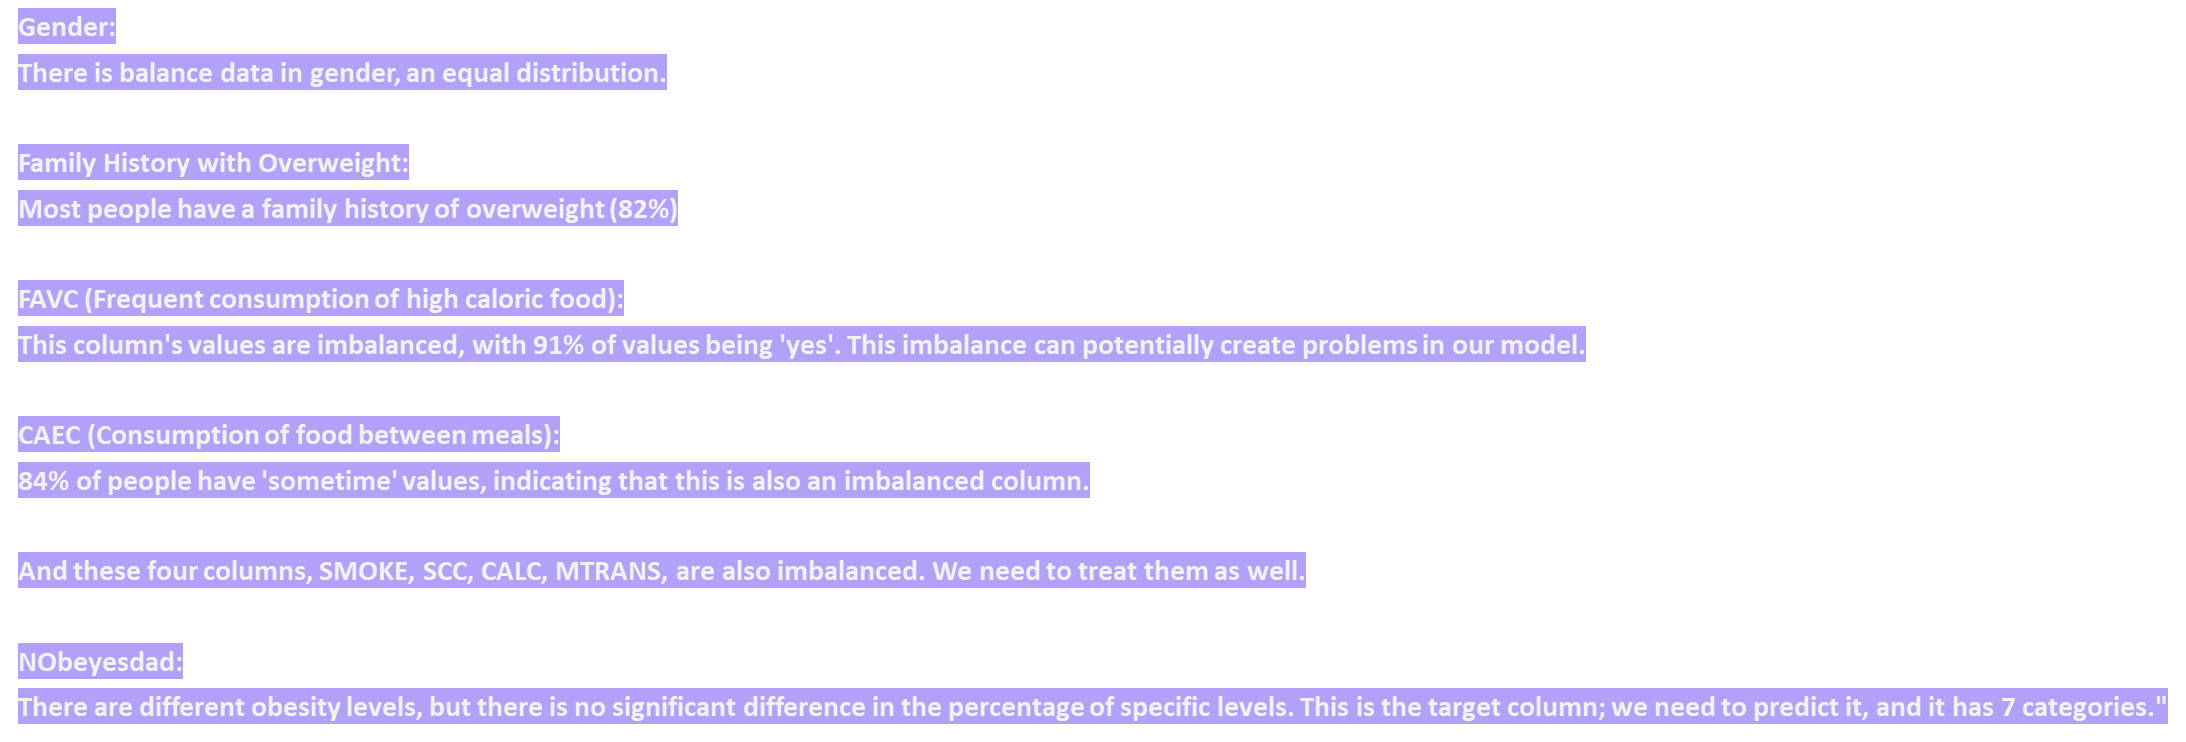

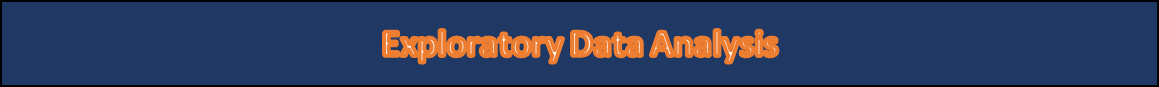

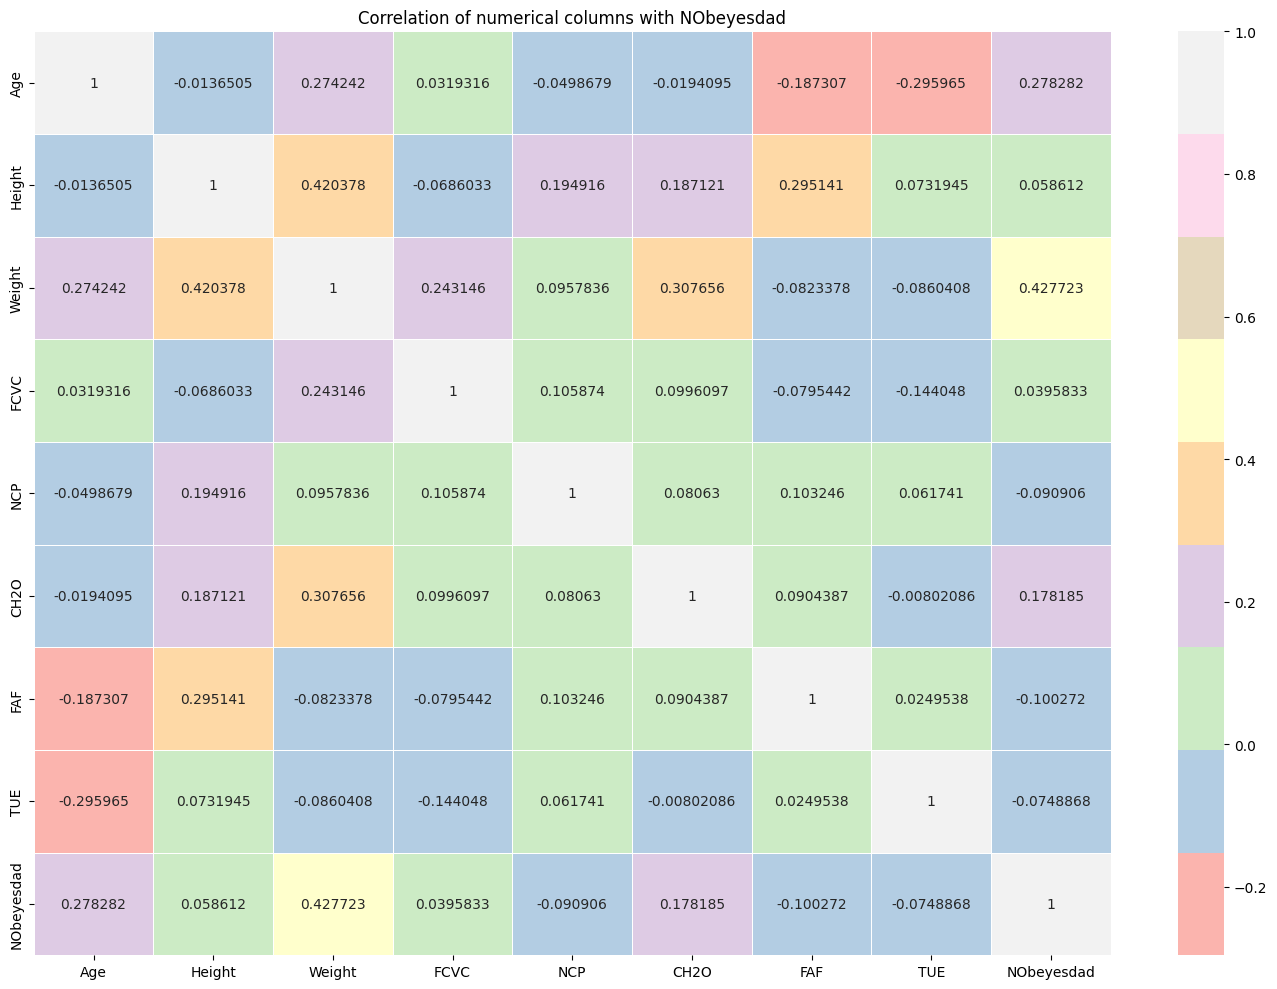

In [15]:
numeric_df = data.drop(['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS', 'CAEC', 'CALC'], axis=1)
label_encoder = LabelEncoder()
numeric_df['NObeyesdad'] = label_encoder.fit_transform(numeric_df['NObeyesdad'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel1', fmt='g', linewidths=.5)
plt.title('Correlation of numerical columns with NObeyesdad')
plt.tight_layout()
plt.show()


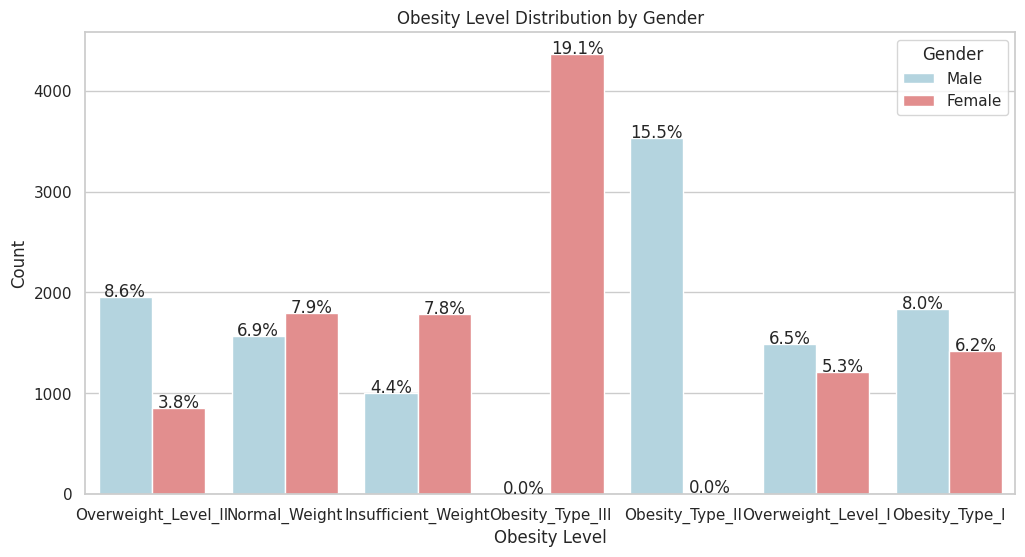

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
custom_palette = {'Male': 'lightblue', 'Female': 'lightcoral'}
ax = sns.countplot(x='NObeyesdad', hue='Gender', data=data, palette=custom_palette)
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height/total*100:.1f}%', ha="center")
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.title('Obesity Level Distribution by Gender')
plt.show()

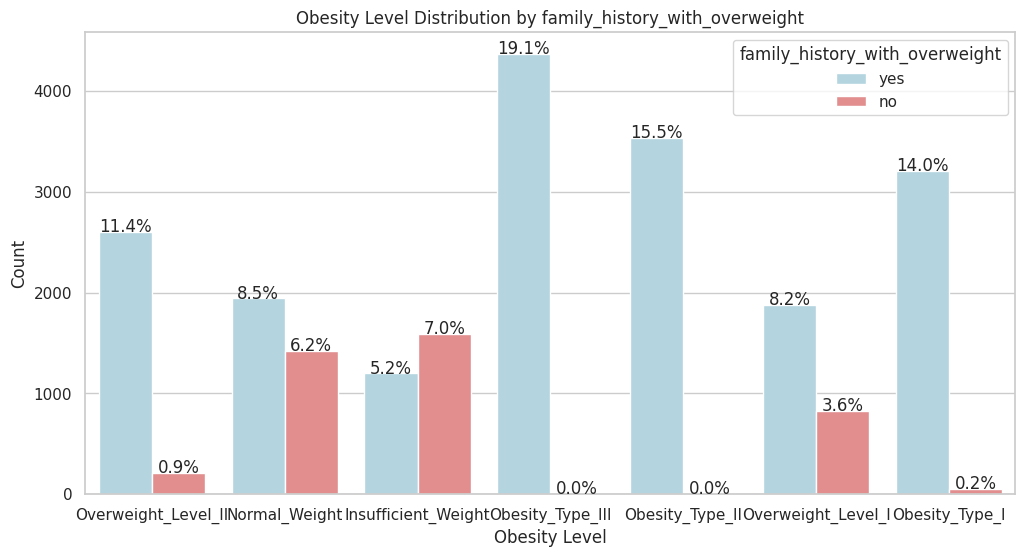

In [17]:
plt.figure(figsize=(12,6))
custome_pallatee = {"yes":"lightblue","no":"lightcoral"}
ax = sns.countplot(x='NObeyesdad',hue='family_history_with_overweight',data=data,palette=custome_pallatee)
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height/total*100:.1f}%', ha="center")
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.title('Obesity Level Distribution by family_history_with_overweight')
plt.show()

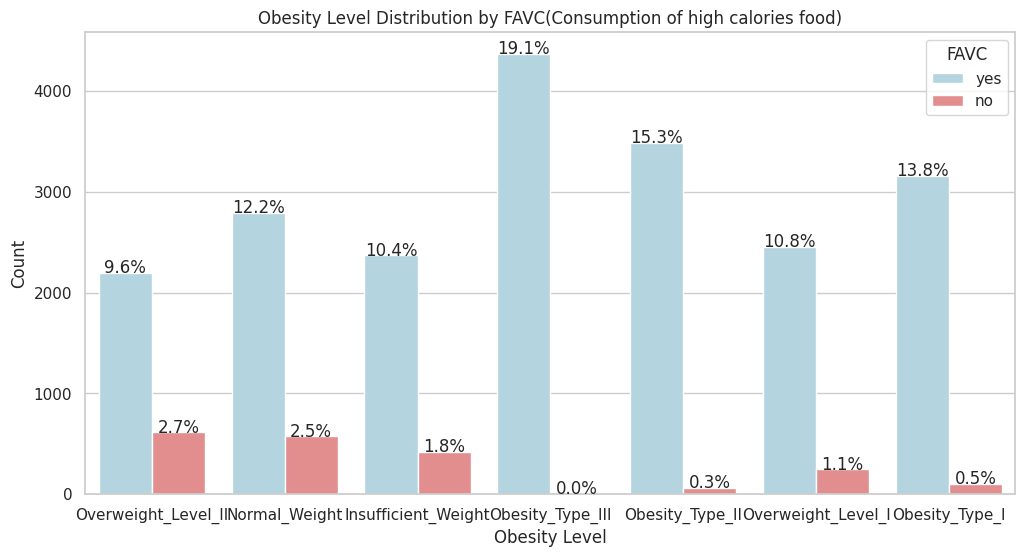

In [18]:
plt.figure(figsize=(12,6))
custome_pallatee = {"yes":"lightblue","no":"lightcoral"}
ax = sns.countplot(x='NObeyesdad',hue='FAVC',data=data,palette=custome_pallatee)

total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height/total*100:.1f}%', ha="center")

plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.title('Obesity Level Distribution by FAVC(Consumption of high calories food)')

plt.show()


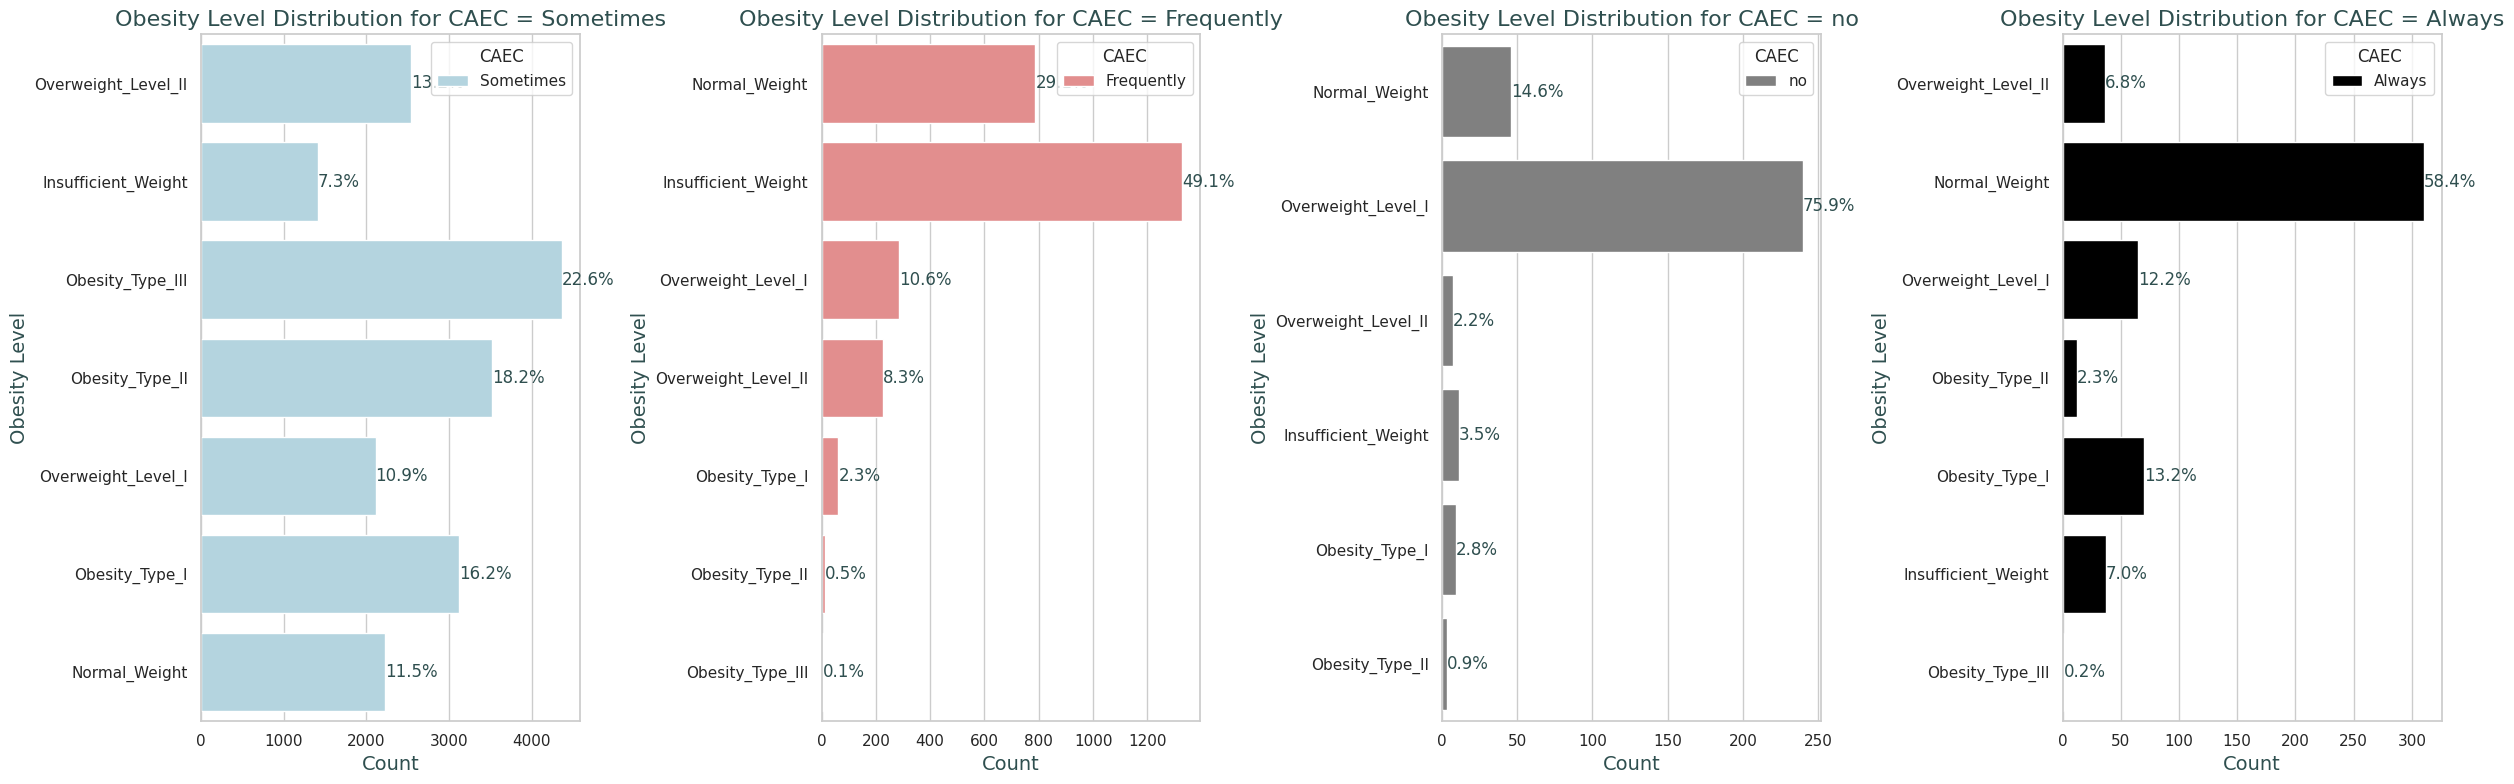

In [19]:

sns.set(style="whitegrid")
plt.figure(figsize=(25, 8))  # Increase the figure size
custom_palette = {"Sometimes": 'lightblue', "Frequently": 'lightcoral', "no": 'grey', "Always": 'black'}
caec_values = ['Sometimes', 'Frequently', 'no', 'Always']
for i, caec_value in enumerate(caec_values, start=1):
    plt.subplot(1, 4, i)  
    subset_data = data[data['CAEC'] == caec_value]
    ax = sns.countplot(y='NObeyesdad', hue='CAEC', data=subset_data, palette=custom_palette)
    total = len(subset_data)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height() / 2.,
                f'{width/total*100:.1f}%', va="center", fontsize=12, color='darkslategray')
    plt.ylabel('Obesity Level', fontsize=14, color='darkslategray')
    plt.xlabel('Count', fontsize=14, color='darkslategray')
    plt.title(f'Obesity Level Distribution for CAEC = {caec_value}', fontsize=16, color='darkslategray')
plt.tight_layout()
plt.show()

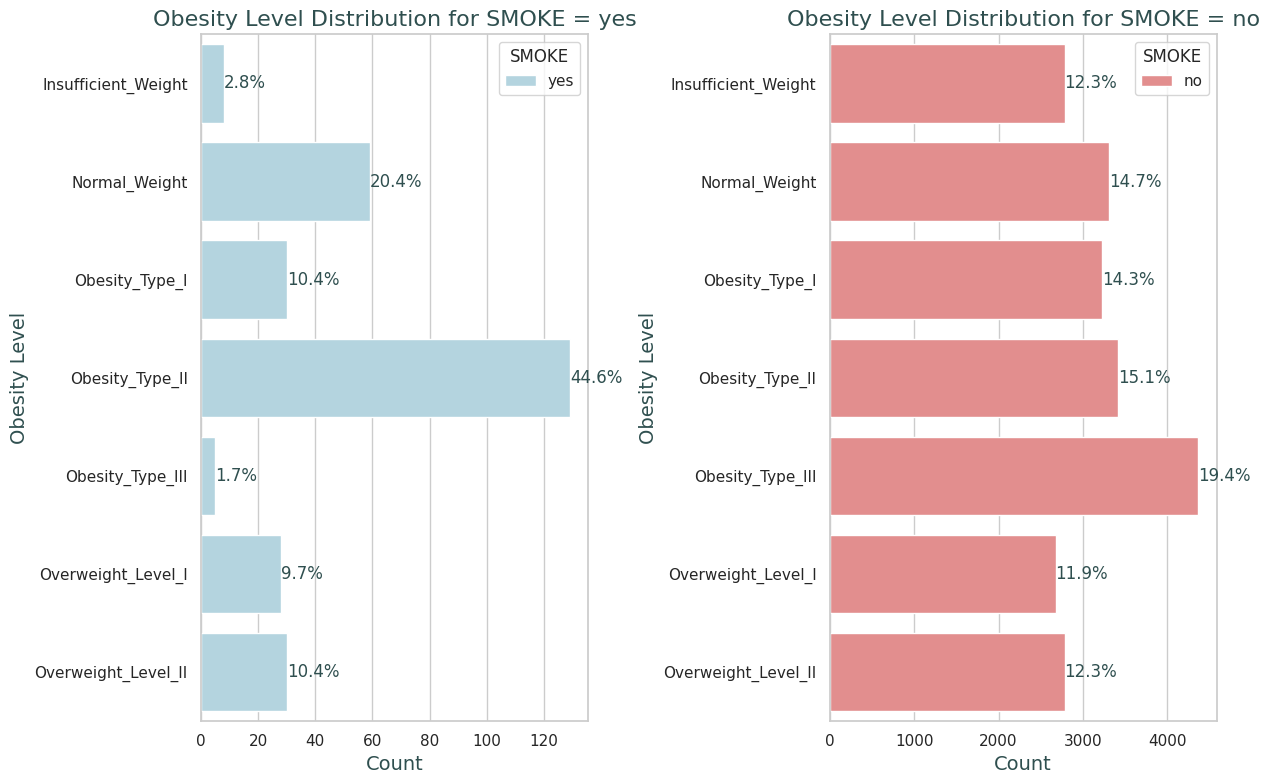

In [20]:

sns.set(style="whitegrid")

plt.figure(figsize=(25, 8))

custom_palette = {"yes": 'lightblue', "no": 'lightcoral'}

caec_values = ['yes', 'no']

obesity_levels = data['NObeyesdad'].unique()
obesity_levels.sort()

for i, caec_value in enumerate(caec_values, start=1):
    plt.subplot(1, 4, i)
    
    subset_data = data[data['SMOKE'] == caec_value]

    ax = sns.countplot(y='NObeyesdad', hue='SMOKE', data=subset_data, palette=custom_palette, order=obesity_levels)

    total = len(subset_data)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height() / 2.,
                f'{width/total*100:.1f}%', va="center", fontsize=12, color='darkslategray')

    plt.ylabel('Obesity Level', fontsize=14, color='darkslategray')
    plt.xlabel('Count', fontsize=14, color='darkslategray')
    plt.title(f'Obesity Level Distribution for SMOKE = {caec_value}', fontsize=16, color='darkslategray')

plt.tight_layout()
plt.show()


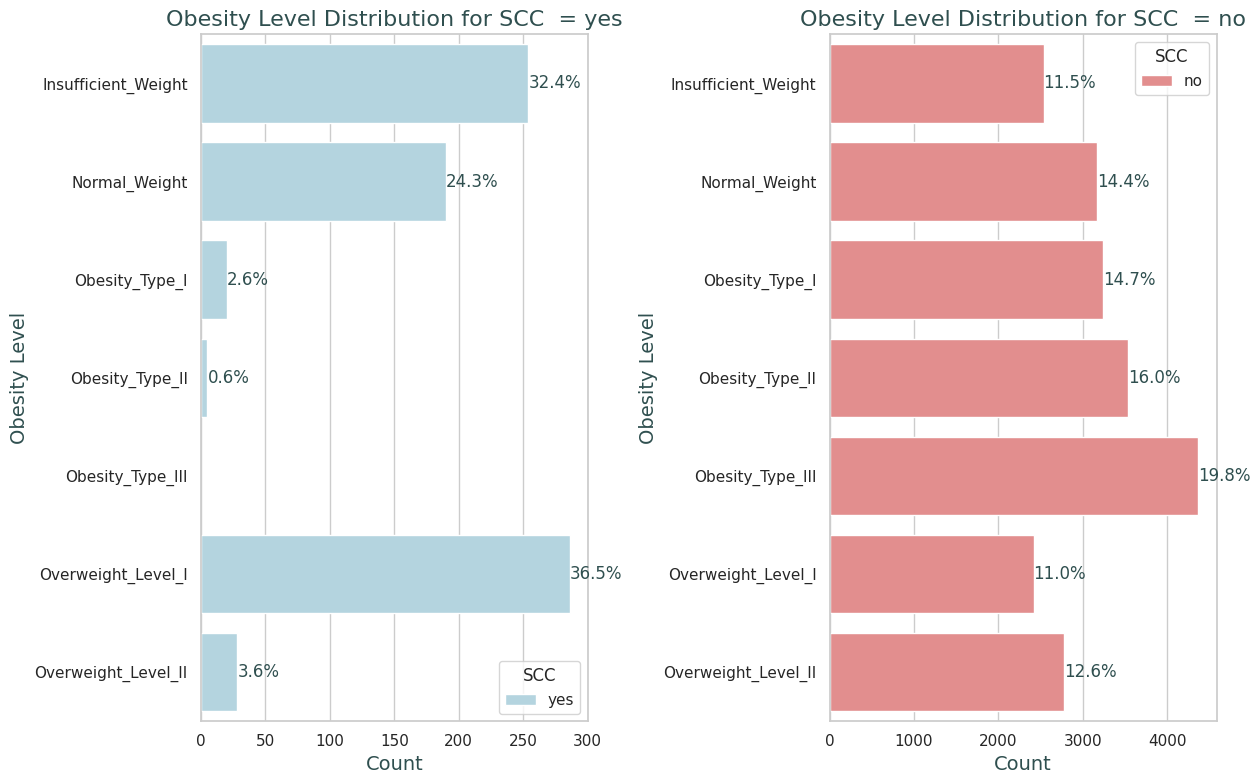

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(25, 8))
custom_palette = {"yes": 'lightblue', "no": 'lightcoral'}
caec_values = ['yes', 'no']# Get the unique categories of 'NObeyesdad' and sort them by index
obesity_levels = data['NObeyesdad'].unique()
obesity_levels.sort()
for i, caec_value in enumerate(caec_values, start=1):
    plt.subplot(1, 4, i)    
    subset_data = data[data['SCC'] == caec_value]
    ax = sns.countplot(y='NObeyesdad', hue='SCC', data=subset_data, palette=custom_palette, order=obesity_levels)
    total = len(subset_data)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height() / 2.,
                f'{width/total*100:.1f}%', va="center", fontsize=12, color='darkslategray')
    plt.ylabel('Obesity Level', fontsize=14, color='darkslategray')
    plt.xlabel('Count', fontsize=14, color='darkslategray')
    plt.title(f'Obesity Level Distribution for SCC  = {caec_value}', fontsize=16, color='darkslategray')
plt.tight_layout()
plt.show()

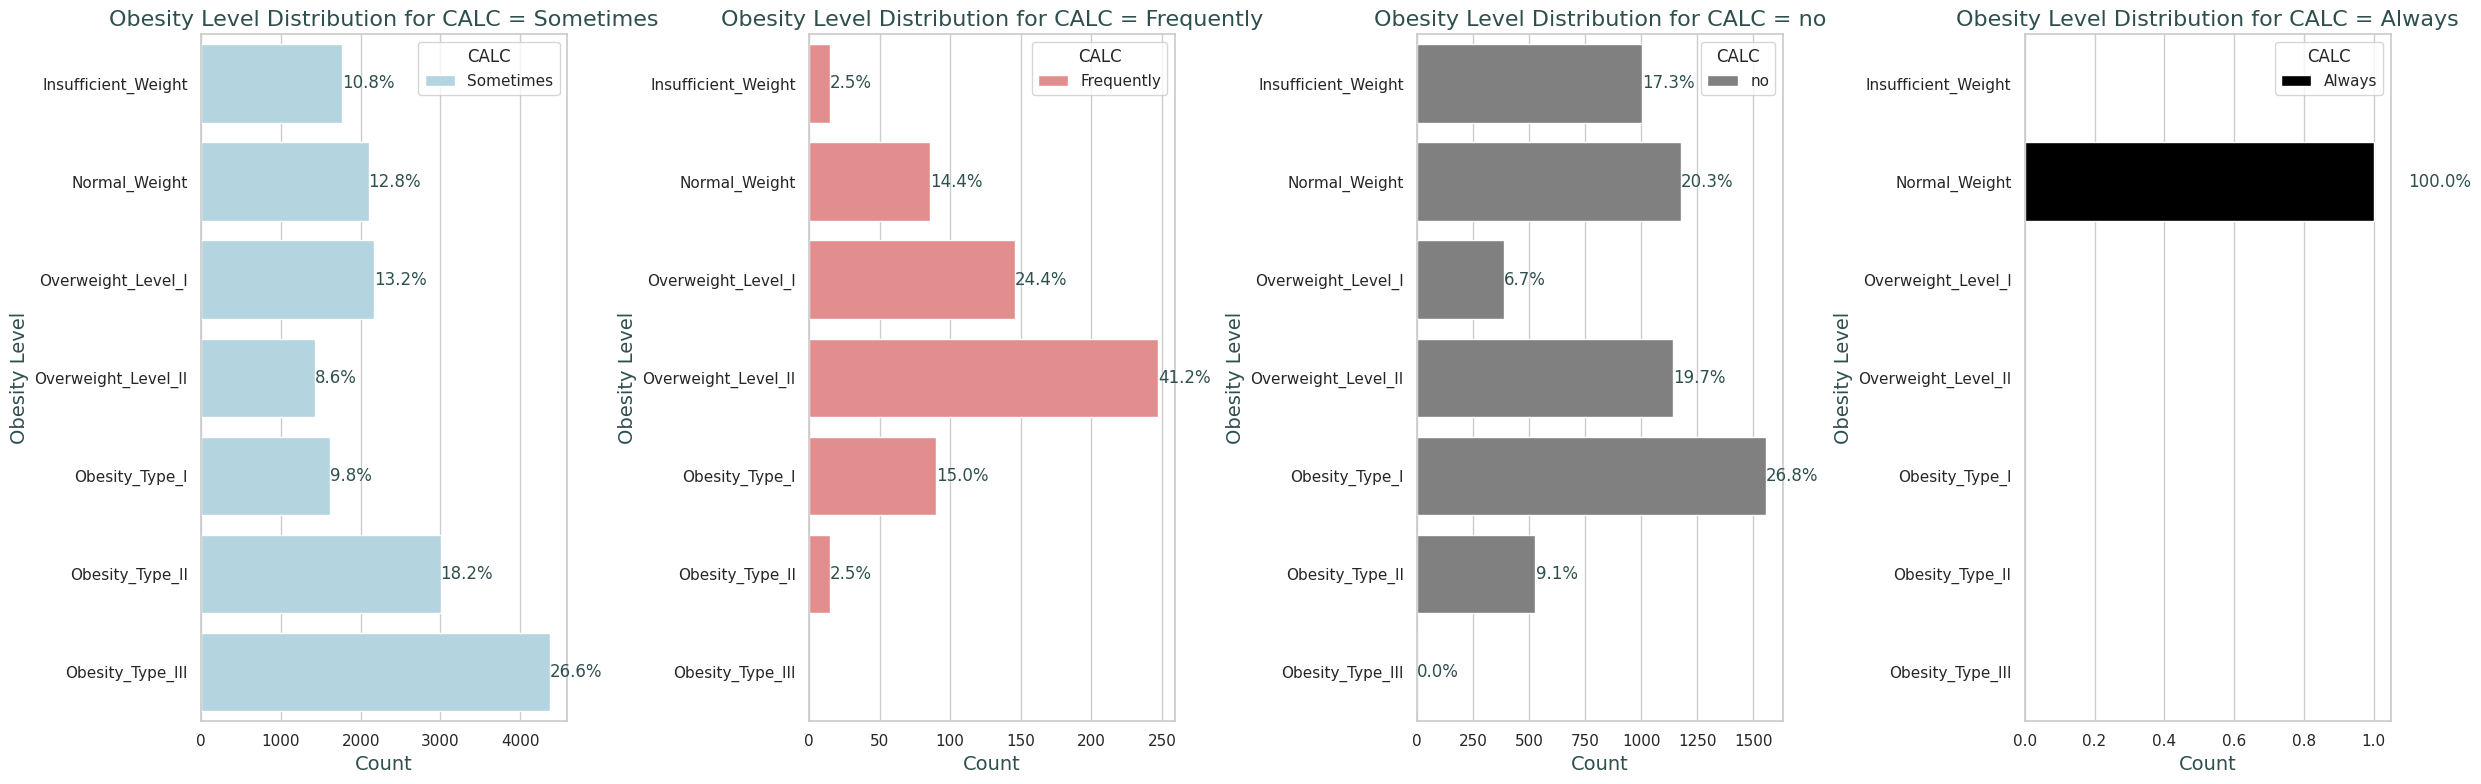

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(25, 8))

# Define custom palette
custom_palette = {"Sometimes": 'lightblue', "Frequently": 'lightcoral', "no": 'grey', "Always": 'black'}

# Define the order of 'NObeyesdad' values
obesity_levels_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# List of values in 'CALC' for subplots
caec_values = ['Sometimes', 'Frequently', 'no', 'Always']

for i, caec_value in enumerate(caec_values, start=1):
    plt.subplot(1, 4, i)
    
    subset_data = data[data['CALC'] == caec_value]

    if not subset_data.empty:
        ax = sns.countplot(y='NObeyesdad', hue='CALC', data=subset_data, palette=custom_palette, order=obesity_levels_order)

        total = len(subset_data)
        for p in ax.patches:
            width = p.get_width()
            ax.text(width + 0.1, p.get_y() + p.get_height() / 2.,
                    f'{width/total*100:.1f}%', va="center", fontsize=12, color='darkslategray')

        plt.ylabel('Obesity Level', fontsize=14, color='darkslategray')
        plt.xlabel('Count', fontsize=14, color='darkslategray')
        plt.title(f'Obesity Level Distribution for CALC = {caec_value}', fontsize=16, color='darkslategray')

plt.tight_layout()
plt.show()


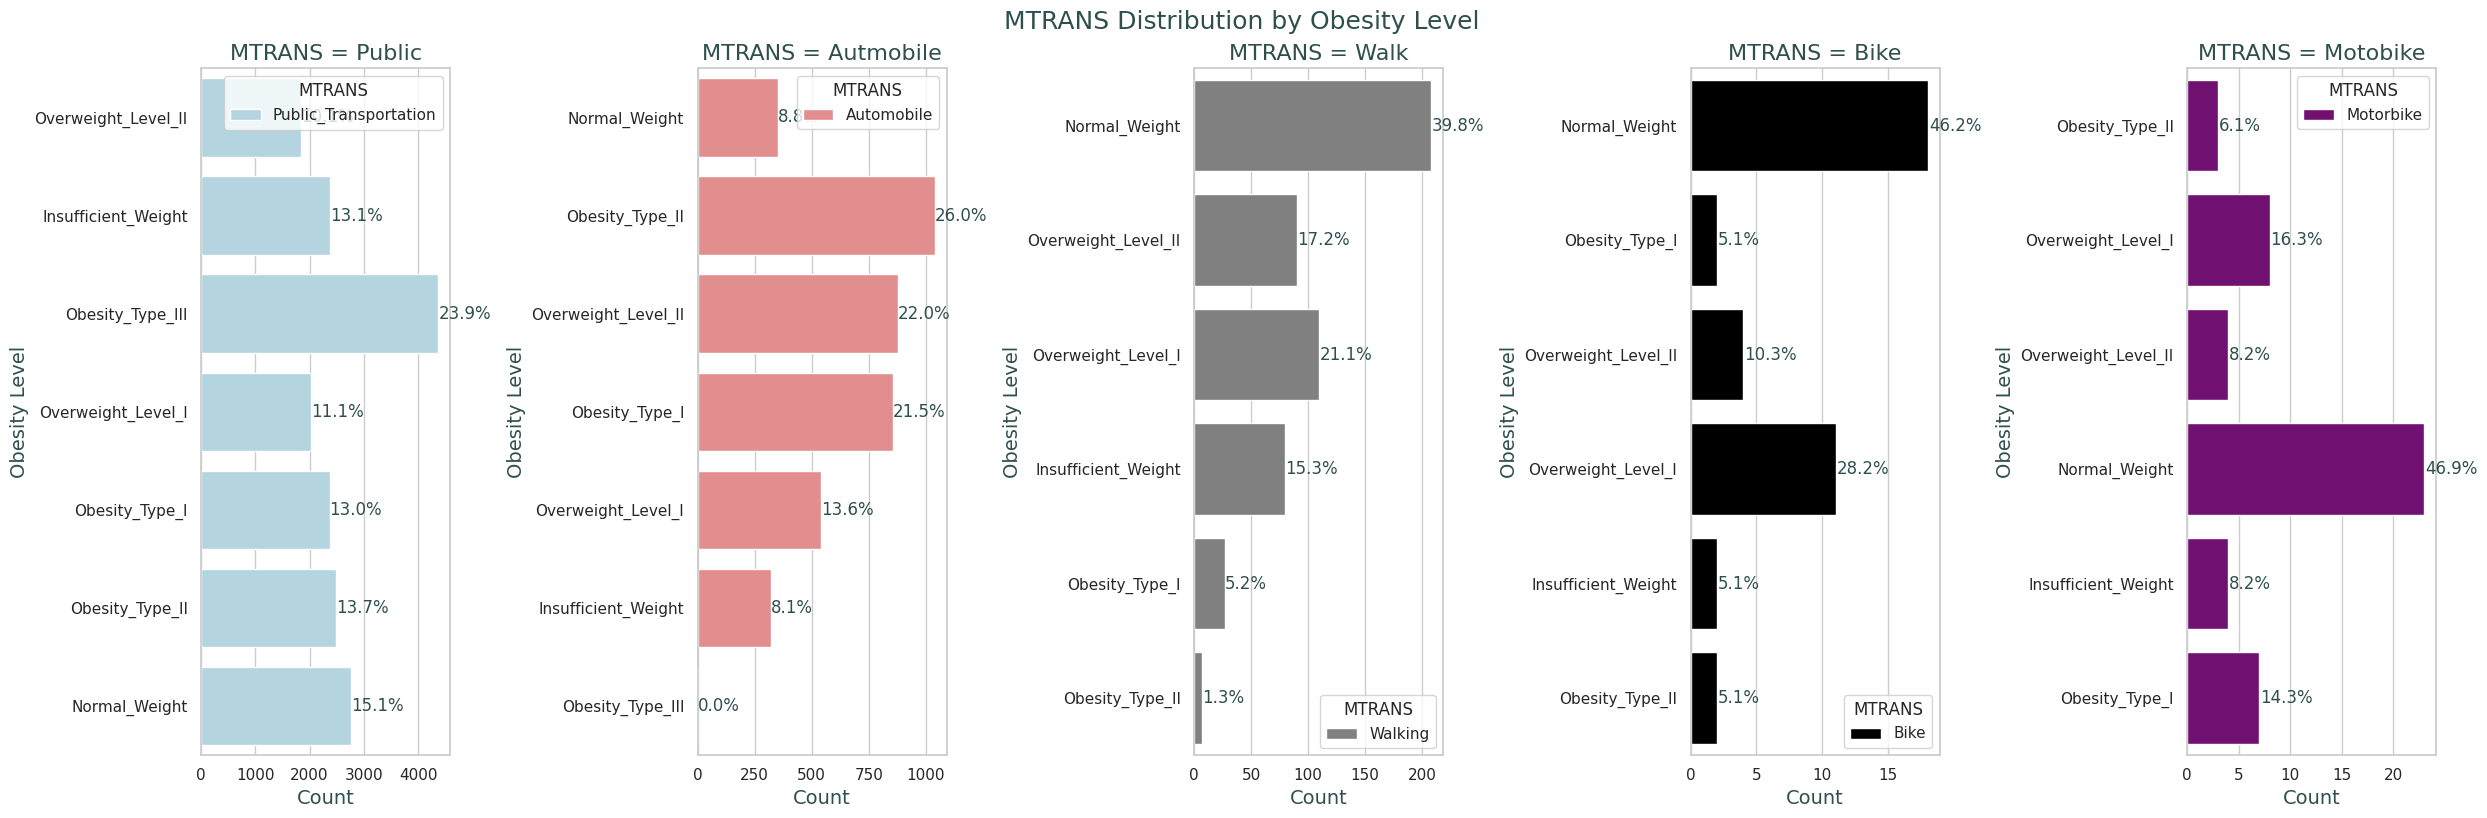

In [23]:


sns.set(style="whitegrid")
plt.figure(figsize=(25, 8))
custom_palette = {"Public_Transportation": 'lightblue', "Automobile": 'lightcoral', "Walking": 'grey', "Bike": 'black', "Motorbike": 'purple'}
mtrans_values = ['Public_Transportation', 'Automobile', 'Walking', 'Bike', 'Motorbike']
mtrans_valuess = ['Public', 'Autmobile', 'Walk', 'Bike', 'Motobike']
for i, mtrans_value in enumerate(mtrans_values, start=1):
    plt.subplot(1, 5, i)
    subset_data = data[data['MTRANS'] == mtrans_value]
    ax = sns.countplot(y='NObeyesdad', hue='MTRANS', data=subset_data, palette=custom_palette)
    total = len(subset_data)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height() / 2.,
                f'{width/total*100:.1f}%', va="center", fontsize=12, color='darkslategray')
    plt.ylabel('Obesity Level', fontsize=14, color='darkslategray')
    plt.xlabel('Count', fontsize=14, color='darkslategray')
    plt.title(f'MTRANS = {mtrans_valuess[i-1]}', fontsize=16, color='darkslategray')
plt.tight_layout()
plt.suptitle('MTRANS Distribution by Obesity Level', fontsize=18, color='darkslategray', y=1.02)
plt.show()



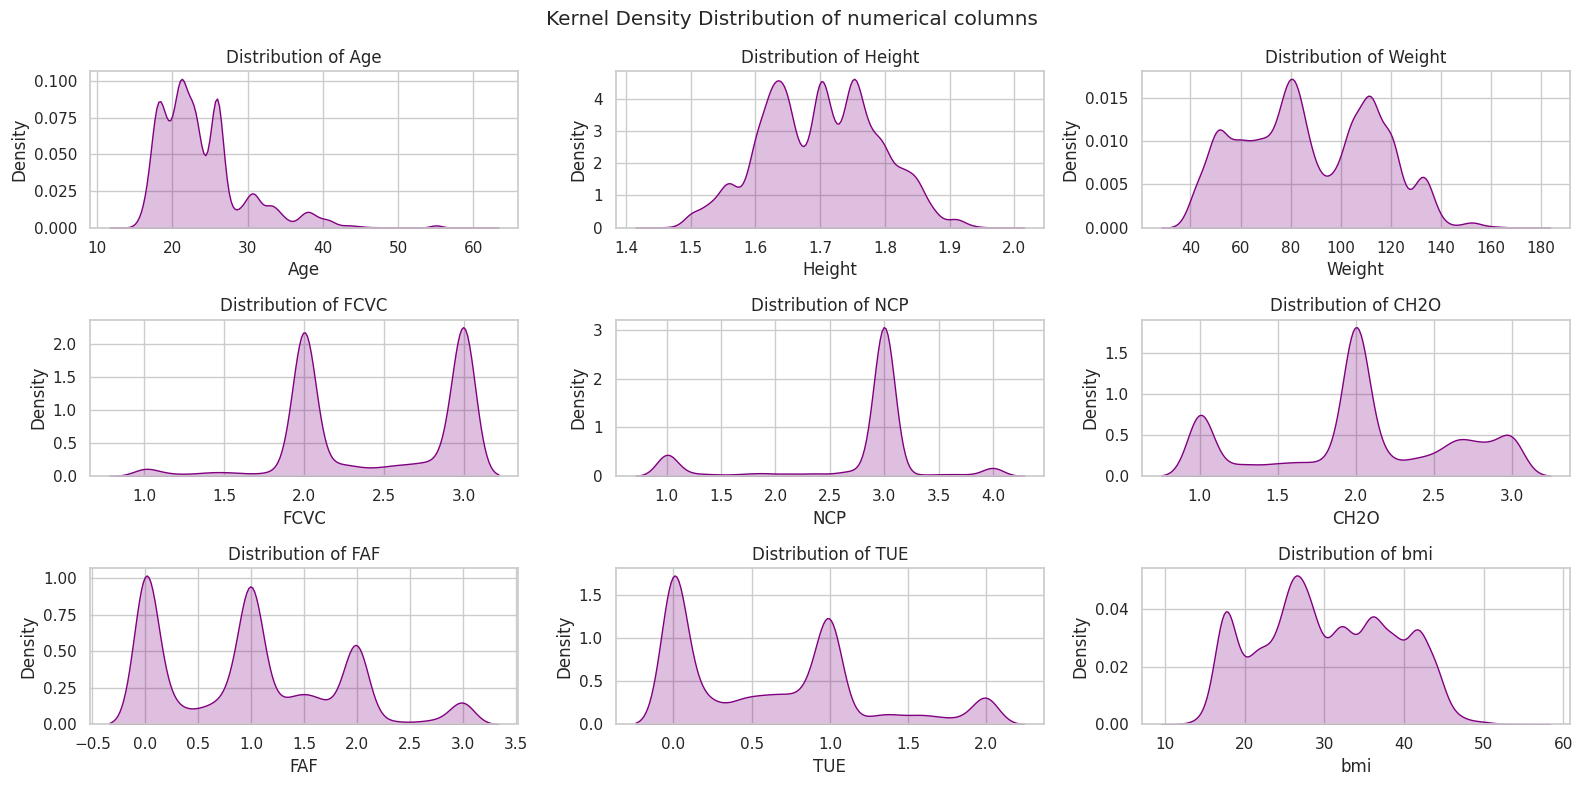

In [24]:
pract = data.copy()
pract['bmi'] = pract['Weight']/(pract['Height']**2)
numerical_columns = pract.select_dtypes(include=['float64', 'int64'])

# Setting up the matplotlib figure
plt.figure(figsize=(16, 8))

# Choosing a purple color
plot_color = "#800080"  # Hex color code for purple

# Plotting kernel density plots for each numerical column
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(pract[column], color=plot_color,fill=True)
    plt.title(f'Distribution of {column}')
    plt.suptitle("Kernel Density Distribution of numerical columns")

plt.tight_layout()

# Show the plot
plt.show()


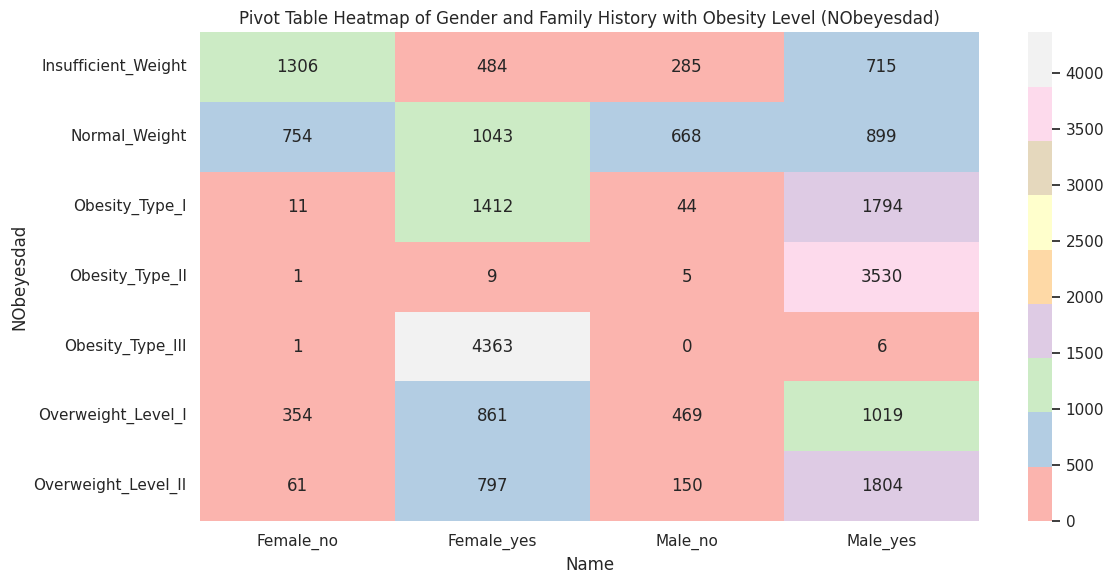

In [25]:
pract['Name'] = pract['Gender'] + '_' + pract['family_history_with_overweight']
grouped_data = pract.groupby(['Name', 'NObeyesdad']).size().reset_index(name='Count')
pivot_table_nobeyes = grouped_data.pivot(index='NObeyesdad', columns='Name', values='Count').fillna(0)
plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 2)
sns.heatmap(pivot_table_nobeyes, annot=True, cmap='Pastel1', fmt='g')
plt.title('Pivot Table Heatmap of Gender and Family History with Obesity Level (NObeyesdad)')
plt.tight_layout()
plt.show()


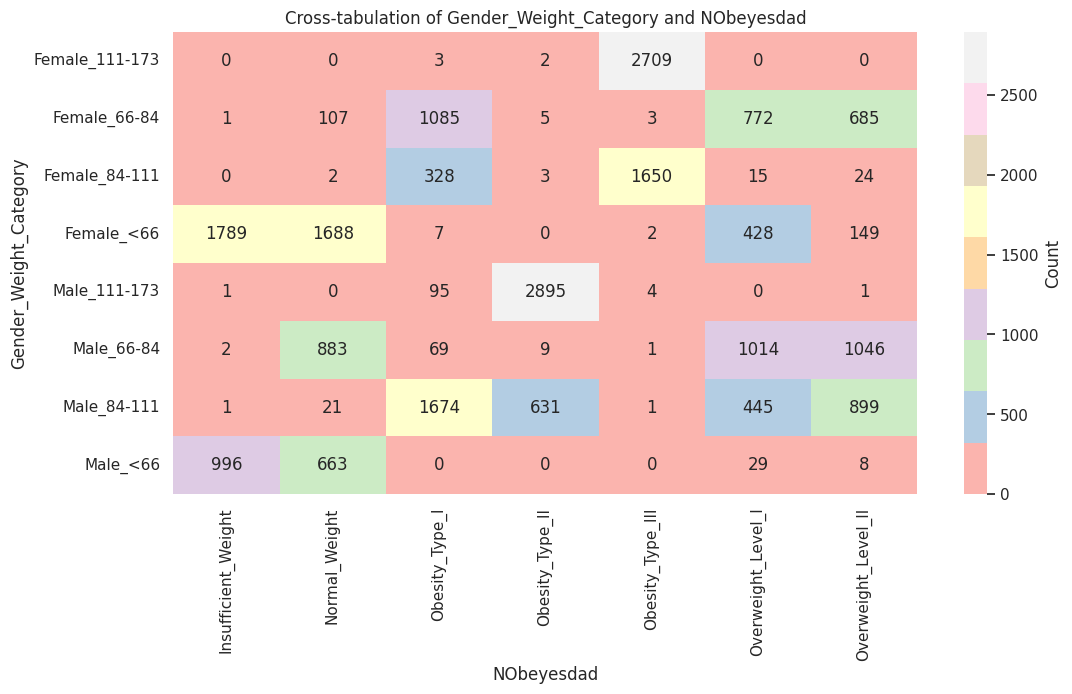

In [26]:
pract['Weight_Category'] = pd.cut(pract['Weight'], bins=[-float('inf'), 66, 84, 111.531208, float('inf')], labels=['<66', '66-84', '84-111', '111-173'])
pract['new'] = pract['Gender'].astype(str) + '_' + pract['Weight_Category'].astype(str)
pivot_table = pd.crosstab(index=pract['new'], columns=pract['NObeyesdad'])
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="Pastel1", fmt='g', cbar_kws={'label': 'Count'})
plt.title('Cross-tabulation of Gender_Weight_Category and NObeyesdad')
plt.xlabel('NObeyesdad')
plt.ylabel('Gender_Weight_Category')
plt.show()


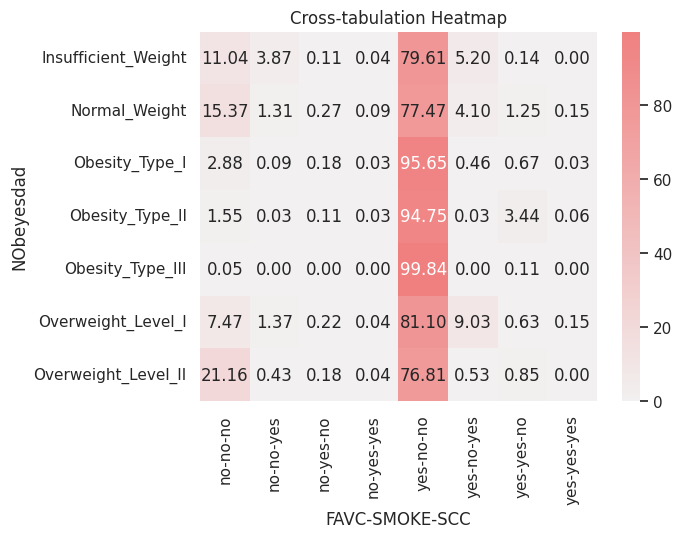

In [27]:
cross_tab = pd.crosstab(index=data['NObeyesdad'], columns=[data['FAVC'], data['SMOKE'],data['SCC']], normalize='index') * 100
unique_color = '#FF5733'
custom_cmap = sns.light_palette('lightcoral', as_cmap=True)
sns.heatmap(cross_tab, cmap=custom_cmap, annot=True, fmt='.2f', cbar=True)
plt.title('Cross-tabulation Heatmap')
plt.show()


In [28]:
import plotly.express as px
fig = px.scatter(pract, x='Age', y='bmi', color='NObeyesdad', title='Scatter Plot of Age and BMI with Obesity Level')
figg = px.scatter(pract, x='Weight', y='Height', color='NObeyesdad', title='Scatter Plot of Height and Weight with Obesity Level')

fig.show()
figg.show()

In [29]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


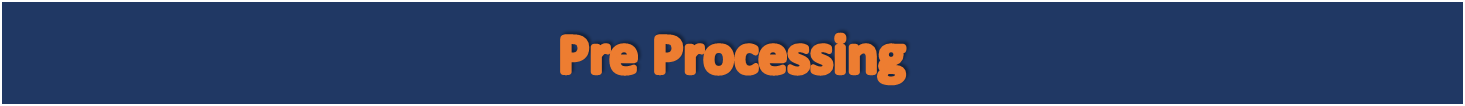

In [30]:
data['Bmi'] = data['Weight']/(data['Height']**2)

In [31]:
data['phisical'] = data['FAF'] - data['TUE']

In [32]:
data['habit'] = data['FCVC'] + data['NCP']


In [33]:
label = LabelEncoder()
orde = OrdinalEncoder()


In [34]:

data[['family_history_with_overweight','FAVC','Gender','SMOKE']] = data[['family_history_with_overweight','FAVC','Gender','SMOKE']].apply(LabelEncoder().fit_transform)
data = pd.get_dummies(data,columns=['SCC'],drop_first=True)
columns = ['CAEC','CALC','MTRANS']
data[columns] = orde.fit_transform(data[columns])


In [35]:
numerical_columns = ['Age', 'Height', 'Weight', 'CH2O','FCVC','NCP','CAEC','TUE','FAF','CALC','Bmi','phisical','habit']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [36]:
data.drop('SMOKE',axis=1,inplace=True)

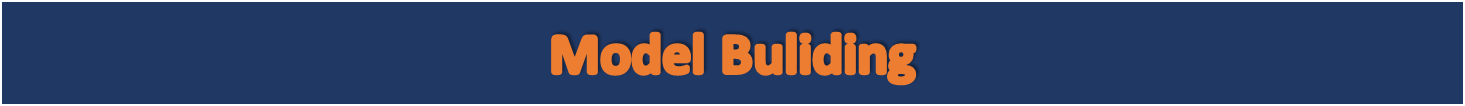

In [37]:
X= data.drop('NObeyesdad',axis=1)
y = data['NObeyesdad']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

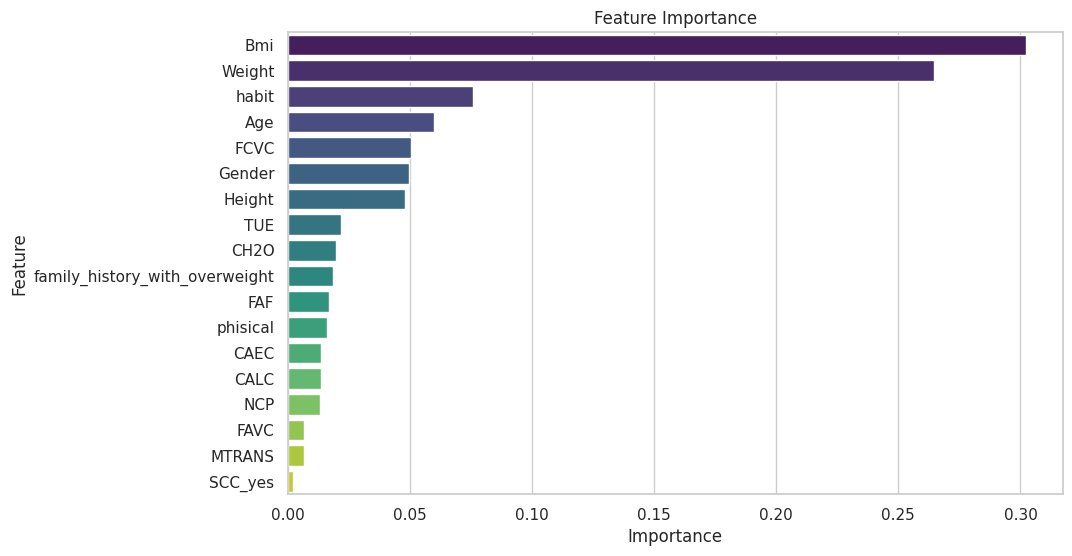

In [39]:
model = RandomForestClassifier(n_estimators=150,criterion='entropy')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


In [40]:
accuracy

0.9076384329174875

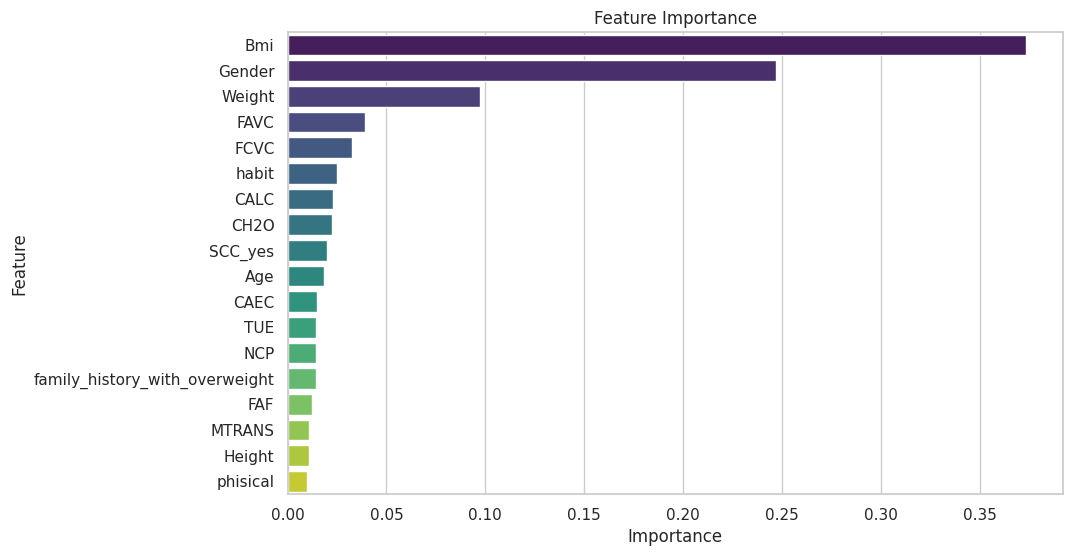

In [41]:
model = XGBClassifier(n_estimators=125,learning_rate=0.2,max_depth=3,subsample=0.8)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


In [42]:
accuracy

0.9122346246443424